In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Аналіз датасет housing.csv

In [4]:
df_hw = pd.read_csv('housing.csv')
df_hw.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df_hw.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
num_rows, num_columns = df_hw.shape
print(f"Кількість рядків: {num_rows}, Кількість стовпчиків: {num_columns}")

Кількість рядків: 545, Кількість стовпчиків: 13


In [7]:
df_hw.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [8]:
df_hw.isnull().sum() / len(df_hw)  # Обчислення частки пропущених значень у кожному стовпці датасету

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [9]:
# Вибір тільки числових стовпців
numeric_df = df_hw.select_dtypes(include=['float64', 'int64'])

# Обчислення кореляційної матриці для числових змінних у датасеті
correlation_matrix = numeric_df.corr()
correlation_matrix  # Відображення кореляційної матриці

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

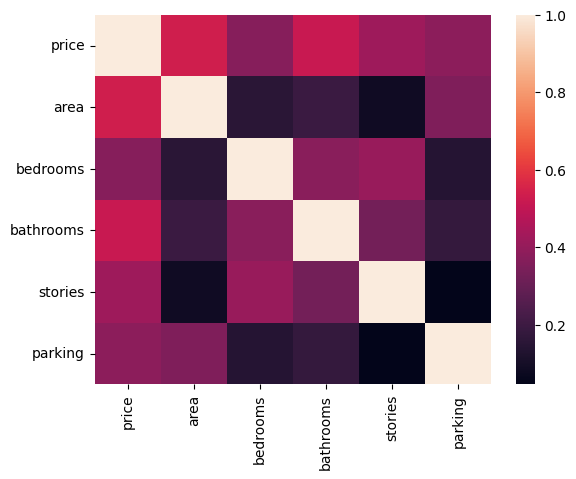

In [10]:
sns.heatmap(numeric_df.corr())

In [11]:
# Підготовка даних: вибір ознак та цільової змінної
X = df_hw[['area', 'bedrooms', 'bathrooms']].values
y = df_hw['price'].values

# Нормалізація ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Додаємо стовпець одиниць для обліку вільного члена
ones = np.ones((X_scaled.shape[0], 1))
X_scaled = np.hstack((ones, X_scaled))

# Параметри градієнтного спуску
learning_rate = 0.001  # Змініть значення
num_iter = 5000  # Збільшіть кількість ітерацій
eps = 0.0001  # Поріг для перевірки зупинки

*   напишіть функцію гіпотези лінійної регресії у векторному вигляді;

In [12]:
def hypothesis(X, w):
    """
    Функція гіпотези лінійної регресії у векторному вигляді.

    Параметри:
    X (numpy.ndarray): Матриця вхідних даних (m x n), де m - кількість зразків, n - кількість ознак.
    w (numpy.ndarray): Вектор ваг (n, 1).

    Повертає:
    numpy.ndarray: Вектор передбачених значень (m, 1).
    """
    return np.dot(X, w)  # Обчислення скалярного добутку матриці X і вектора w для отримання передбачених значень

*   створіть функцію для обчислення функції втрат у векторному вигляді;

In [13]:
def loss_function(X, y, w):
    """
    Функція для обчислення функції втрат (MSE) у векторному вигляді.

    Параметри:
    X (numpy.ndarray): Матриця вхідних даних (m x n).
    y (numpy.ndarray): Вектор істинних значень (m,).
    w (numpy.ndarray): Вектор ваг (n,).

    Повертає:
    float: Значення функції втрат.
    """
    m = len(y)  # Кількість зразків

    # Обчислення передбачених значень
    predictions = hypothesis(X, w)

    # Обчислення помилки передбачення
    error = predictions - y

    # Обчислення функції втрат (середнього квадратичного відхилення)
    return (1 / (2 * m)) * np.dot(error.T, error)

    # короткий запис:
    # return np.square(h(X, w) - y).sum() / (2 * len(X))

*   реалізуйте один крок градієнтного спуску;

In [14]:
def gradient_step(X, y, w, learning_rate):
    """
    Функція для виконання одного кроку градієнтного спуску з обчисленням градієнтів.

    Параметри:
    X (numpy.ndarray): Матриця вхідних даних (m x n).
    y (numpy.ndarray): Вектор істинних значень (m,).
    w (numpy.ndarray): Вектор ваг (n,).
    learning_rate (float): Коефіцієнт навчання.

    Повертає:
    numpy.ndarray: Оновлений вектор ваг.
    """
    m = len(y)  # Кількість зразків

    # Обчислення передбачених значень
    predictions = hypothesis(X, w)

    # Помилка передбачення
    error = predictions - y

    # Обчислення градієнтів
    gradients = (1 / m) * np.dot(X.T, error)

    # Оновлення ваг
    w = w - learning_rate * gradients

    return w

*   функція для виконання градієнтного спуску

In [15]:
def gradient(X, y, learning_rate, num_iter, eps):
    """
    Функція для виконання градієнтного спуску.

    Параметри:
    X (numpy.ndarray): Матриця вхідних даних (m x n).
    y (numpy.ndarray): Вектор істинних значень (m,).
    learning_rate (float): Коефіцієнт навчання.
    num_iter (int): Кількість ітерацій для градієнтного спуску.
    eps (float): Поріг для перевірки зупинки алгоритму.

    Повертає:
    tuple: Вектор ваг і список значень функції втрат на кожній ітерації.
    """
    w = np.zeros(X.shape[1])  # Ініціалізація ваг

    # Обчислення початкової функції втрат
    loss = loss_function(X, y, w)
    loss_history = [loss]

    for _ in range(num_iter):
        # Виконання одного кроку градієнтного спуску
        w = gradient_step(X, y, w, learning_rate)

        # Обчислення функції втрат після оновлення ваг
        loss = loss_function(X, y, w)

        # Перевірка, чи зміни в функції втрат менші за eps
        if abs(loss - loss_history[-1]) < eps:
            loss_history.append(loss)
            break

        loss_history.append(loss)

    return w, loss_history

*   знайдіть найкращі параметри  𝑤 для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

In [16]:
# Виконання градієнтного спуску
weights_gd, loss_history_gd = gradient(X_scaled, y, learning_rate, num_iter, eps)
print("Ваги після градієнтного спуску:", weights_gd)

Ваги після градієнтного спуску: [4734691.52675022  817080.13621907  308354.77721354  689685.83107034]


*   знайдіть ці ж параметри за допомогою аналітичного рішення;

In [17]:
# Аналітичне рішення для знаходження оптимальних параметрів
def analytical_solution(X, y):
    """
    Функція для обчислення оптимальних ваг з допомогою аналітичного рішення (нормальні рівняння).

    Параметри:
    X (numpy.ndarray): Матриця вхідних даних (m x n).
    y (numpy.ndarray): Вектор істинних значень (m,).

    Повертає:
    numpy.ndarray: Вектор оптимальних ваг.
    """
    X_transpose = X.T  # Транспонування матриці X
    w = np.linalg.inv(X_transpose @ X) @ X_transpose @ y  # Нормальні рівняння
    return w

# Обчислення ваг аналітично
weights_analytical = analytical_solution(X_scaled, y)
print("Аналитичні ваги:", weights_analytical)

Аналитичні ваги: [4766729.24770642  821214.14349519  299983.57107963  695808.52272538]


*   порівняйте отримані результати.

**Аналіз**

Різниці між вагами після градієнтного спуску і аналітичними вагами дуже малі. Це свідчить про те, що реалізації обох методів (градієнтний спуск і аналітичний розрахунок) працюють правильно і результати близькі до точного рішення.

**Висновки**

**Градієнтний спуск:** добре працює, результати дуже близькі до аналітичних, що свідчить про коректність реалізації.

**Аналітичне рішення:** дає точний результат завдяки точному вирішенню нормальних рівнянь.

Малі відмінності можуть бути обумовлені числовими похибками або тим, що градієнтний спуск може потребувати більше ітерацій або іншого коефіцієнта навчання.

Це показує, що код для градієнтного спуску успішно імплементовано і результат відповідає аналітичному рішенню.